# Vehicle Detection
The goal of this project is to build a pipeline that detects vehicles in a video (to simulate detecting vehicles while on the road).

The pipeline includes:

The pipeline is demonstrated on six test images.

In [1]:
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

test_image_file_names = glob.glob('./test_images/test*.jpg')
num_images = len(test_image_file_names)

In [7]:
images = []
for idx, test_image_file_name in enumerate(test_image_file_names):
    image = mpimg.imread(test_image_file_name)
    images.append(image)
num_channels = images[0].shape[2]

## Extract HOG features of each image
The histogram of gradients is extracted from each image.  The image is first grayscaled then run through scikit-image's [hog](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog) function.

The histogram of gradients acts as a "fingerprint" to the image. Images with cars will share a similar fingerprint.

In [2]:
from skimage import color
from skimage.feature import hog

def extract_hog_features(image, num_orients, pixels_per_cell, cells_per_block, return_hog_img=True, return_feature_vec=True):
    grayscale_img = color.rgb2gray(image)
    return hog(grayscale_img, orientations=num_orients, pixels_per_cell=(pixels_per_cell, pixels_per_cell), cells_per_block=(cells_per_block, cells_per_block), visualise=return_hog_img, transform_sqrt=True)

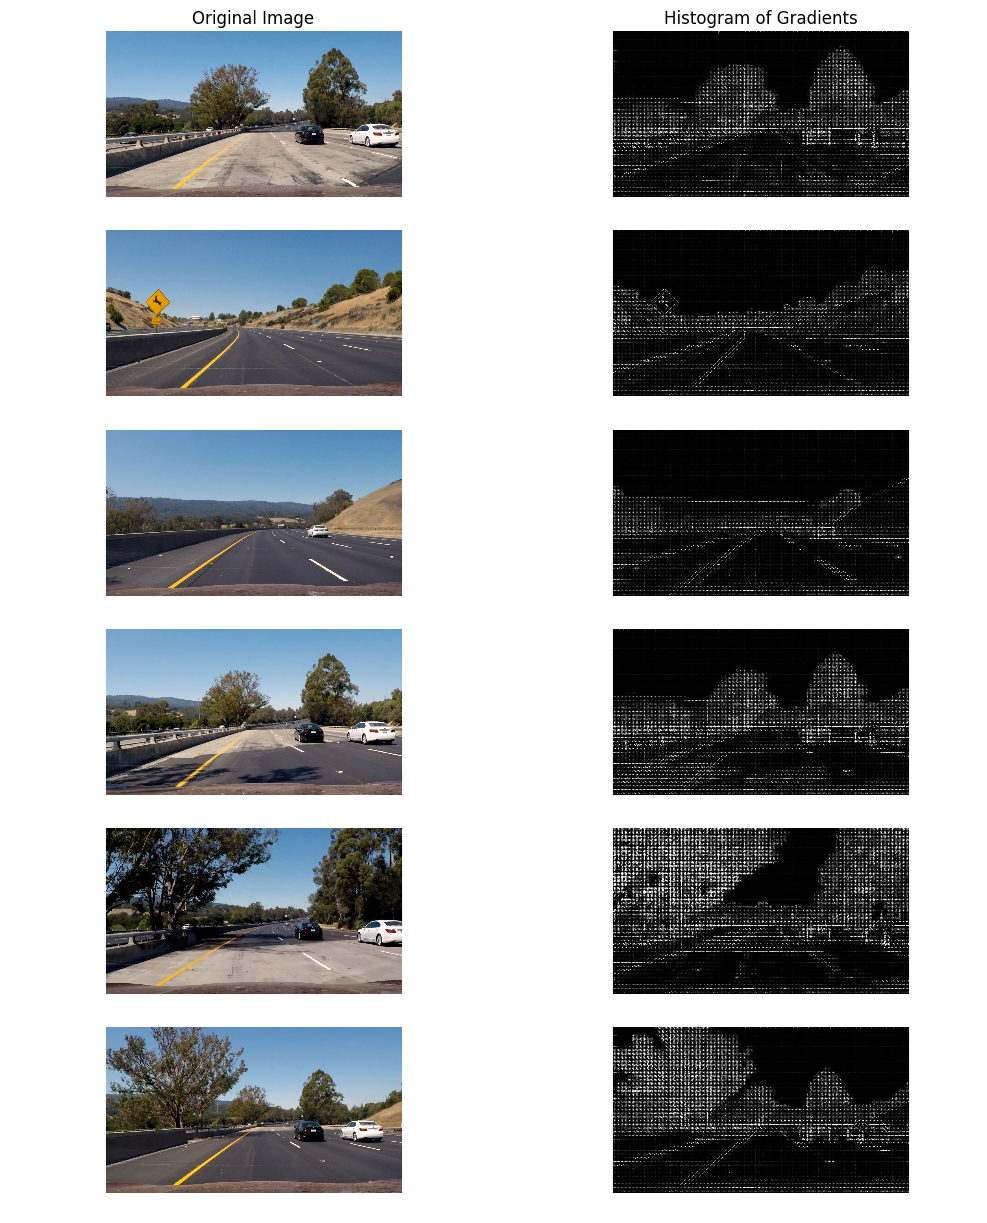

In [15]:
from skimage import exposure

num_orientations = 18
pixels_per_cell = 16
cells_per_block = 1

fig, axarr = plt.subplots(num_images, 2, figsize=(12, 15), sharey=True)
axarr[0, 0].set_title('Original Image')
axarr[0, 1].set_title('Histogram of Gradients')

hogs = []
hog_images = []
for idx, image in enumerate(images):
    histo_of_grads, hog_img = extract_hog_features(image, num_orientations, pixels_per_cell, cells_per_block, return_feature_vec=False)
    hogs.append(histo_of_grads)
    hog_images.append(hog_img)

    # Rescale histogram for better display
    hog_img = exposure.rescale_intensity(hog_img, in_range=(0, 0.02))

    axarr[idx, 0].imshow(image)
    axarr[idx, 1].imshow(hog_img, cmap='gray')
    axarr[idx, 0].axis('off')
    axarr[idx, 1].axis('off')
plt.show()

# Color Histogram Features

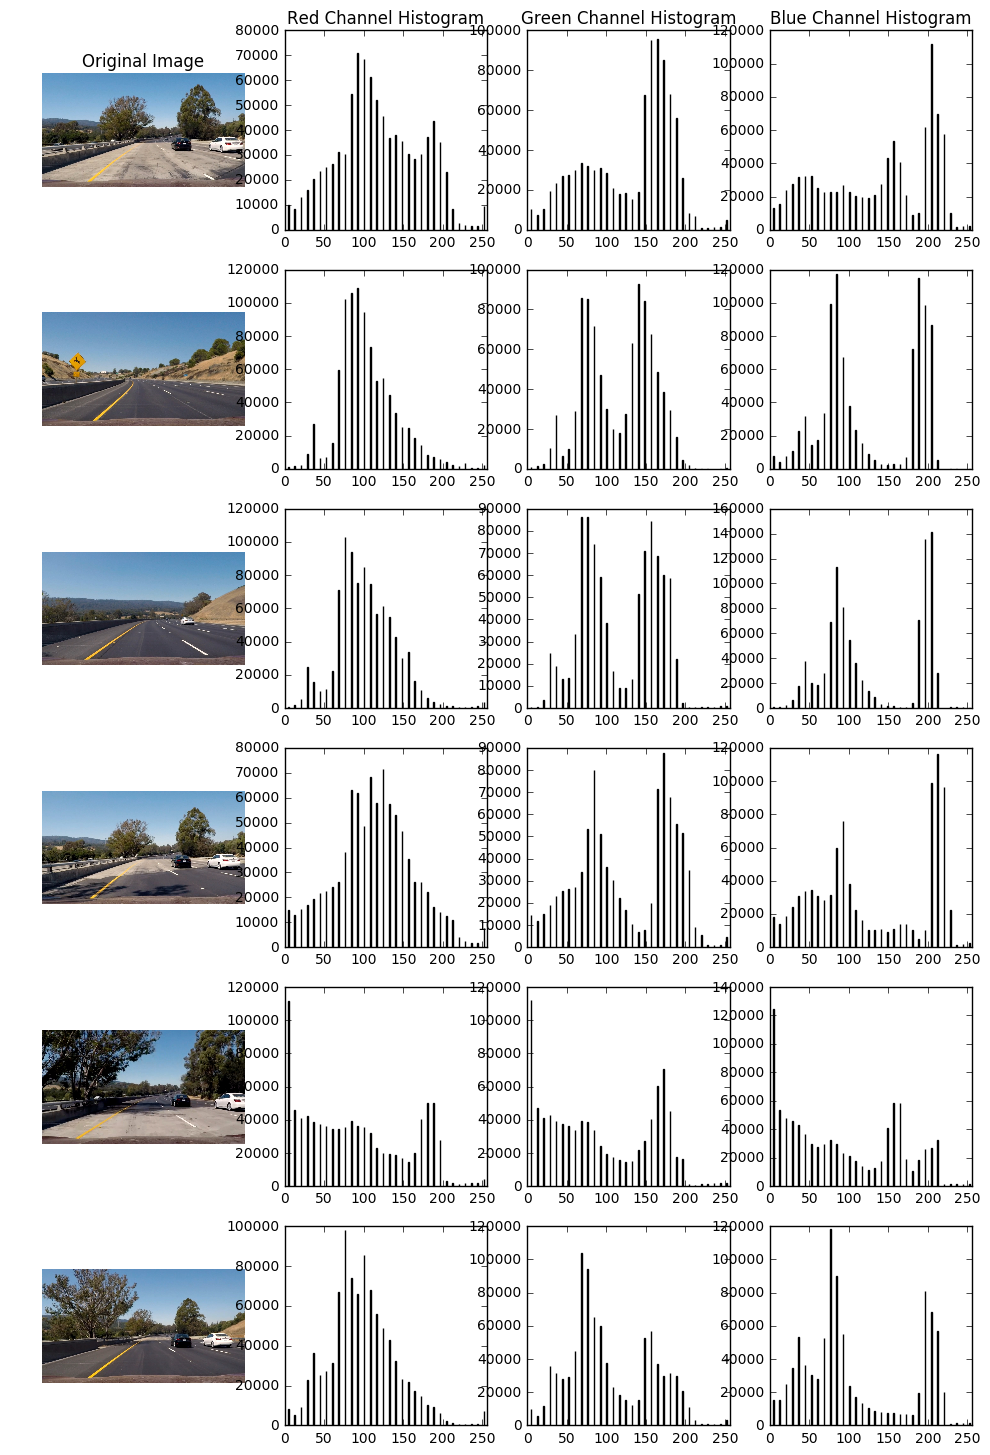

96


In [30]:
def get_color_histograms(img):
    histograms = []
    for channel_idx in range(num_channels):
        channel = img[:, :, channel_idx]
        channel_histogram = np.histogram(channel, bins=32, range=(0, 256))
        histograms.append(channel_histogram)
    return histograms

fig, axarr = plt.subplots(num_images, num_channels+1, figsize=(12, 18))
axarr[0, 0].set_title('Original Image')
axarr[0, 1].set_title('Red Channel Histogram')
axarr[0, 2].set_title('Green Channel Histogram')
axarr[0, 3].set_title('Blue Channel Histogram')

color_histogram_feature_vector = []
for idx, image in enumerate(images):
    histogram_data = get_color_histograms(image)

    R_histogram = histogram_data[0][0]
    G_histogram = histogram_data[1][0]
    B_histogram = histogram_data[2][0]
    bin_edges = histogram_data[0][1]
    bin_centers = (bin_edges[1:] + bin_edges[0:-1])/2

    color_histogram_feature_vector.append(np.concatenate((R_histogram, G_histogram, B_histogram)))

    # Plot Data
    bin_centers = (bin_edges[1:] + bin_edges[0:-1])/2
    axarr[idx, 0].imshow(image)
    axarr[idx, 0].axis('off')
    
    for j, histogram_datum in enumerate(histogram_data):
        histogram = histogram_datum[0]
        axarr[idx, j+1].bar(bin_centers, histogram)
        axarr[idx, j+1].set_xlim(0, 256)
plt.show()